<a href="https://colab.research.google.com/github/ChagataiDuru/CS304-IntroAI-CollabNotebooks/blob/main/CS304_HW3_Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 - Question 1


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Question 1) Part a

1. Compute the Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) projections for the given 2D dataset with two classes, $\omega_1$ and $\omega_2$.
    - Samples for class 1 ($\omega_1$): $\mathbf{X}_1 = (x_1, x_2) = \{(4, 2), (2, 4), (2, 3), (3, 6), (4, 4)\}$
    - Samples for class 2 ($\omega_2$): $\mathbf{X}_2 = (x_1, x_2) = \{(6, 8), (9, 5), (8, 7), (10, 8)\}$

2. For PCA:
    - Calculate the principal components of the combined data matrix $\mathbf{X}$.
    - Project the data onto the first principal component and plot the projected points for each class.
    - Draw the first principal component vector on the plot.

3. For LDA:
    - Perform Linear Discriminant Analysis on the data matrix $\mathbf{X}$ and the corresponding class labels $\mathbf{y}$.
    - Project the data onto the LDA component and plot the projected points for each class.

***Dataset 1***

In [3]:
# Combine data from both classes
X = np.array([[4, 2], [2, 4], [2, 3], [3, 6], [4, 4], [6, 8], [9, 5], [8, 7], [7, 6]])

# Calculate the mean vector
mean_vector = np.mean(X, axis=0)

# Calculate the covariance matrix
covariance_matrix = np.cov(X.T)

# Calculate the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top eigenvector (corresponding to the largest eigenvalue)
top_eigenvector = eigenvectors[:, 0]

# Project the data onto the top eigenvector
pca_projection = np.dot(X, top_eigenvector)

# Print the PCA projection
print("PCA projection:")
print(pca_projection)

# Separate data by class
X1 = np.array([[4, 2], [2, 4], [2, 3], [3, 6], [4, 4]])
X2 = np.array([[6, 8], [9, 5], [8, 7], [7, 6]])

# Calculate the mean vectors for each class
mean_vector1 = np.mean(X1, axis=0)
mean_vector2 = np.mean(X2, axis=0)

# Calculate the within-class scatter matrix
Sw = np.zeros((2, 2))
for x in X1:
    Sw += np.dot((x - mean_vector1).reshape(-1, 1), (x - mean_vector1).reshape(1, -1))
for x in X2:
    Sw += np.dot((x - mean_vector2).reshape(-1, 1), (x - mean_vector2).reshape(1, -1))

# Calculate the between-class scatter matrix
Sb = np.dot((mean_vector1 - mean_vector2).reshape(-1, 1), (mean_vector1 - mean_vector2).reshape(1, -1))

# Calculate the eigenvectors and eigenvalues of the between-class scatter matrix
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw) @ Sb)

# Sort the eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top eigenvector (corresponding to the largest eigenvalue)
top_eigenvector = eigenvectors[:, 0]

# Project the data onto the top eigenvector
lda_projection = np.dot(X, top_eigenvector)

# Print the LDA projection
print("LDA projection:")
print(lda_projection)

PCA projection:
[ 4.46052434  3.76165546  3.25119103  5.64248319  5.4814532   9.24310866
 10.29141198 10.45244197  9.08207867]
LDA projection:
[ 4.45376982  3.80594875  3.27959414  5.70892313  5.50647905  9.3124278
 10.28415939 10.48660348  9.10998371]


ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

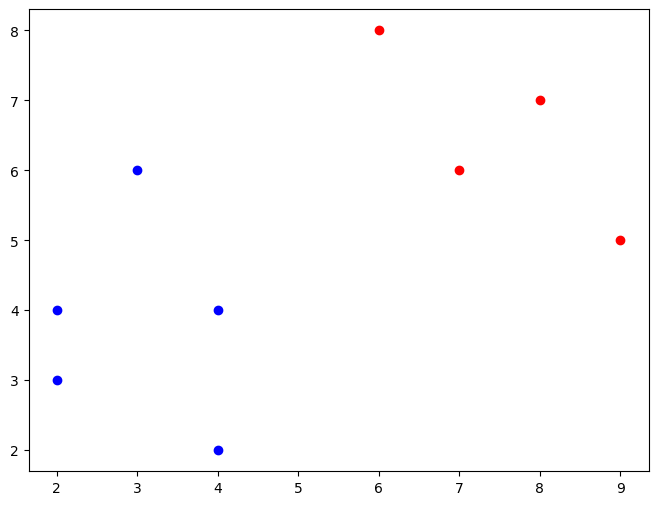

In [5]:
# Plot the original data points
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], label="Class 1", c="blue")
plt.scatter(X2[:, 0], X2[:, 1], label="Class 2", c="red")

# Plot the PCA projection
plt.plot(pca_projection[0:5], pca_projection[5:], label="PCA Projection", c="black")

# Plot the LDA projection
plt.plot(lda_projection[0:5], lda_projection[5:], label="LDA Projection", c="green")

# Add labels and legend
plt.xlabel("PC1 or LD1")
plt.ylabel("PC2 or LD2")
plt.title("PCA and LDA Projections")
plt.legend()
plt.show()

### Part b

Repeat the steps from part (a) for the new set of samples provided for classes $\omega_1$ and $\omega_2$.
- Samples for class 1 ($\omega_1$): $\mathbf{X}_1 = (x_1, x_2) = \{(6, 8), (2, 4), (2, 3), (3, 6)\}$
- Samples for class 2 ($\omega_2$): $\mathbf{X}_2 = (x_1, x_2) = \{(9, 5), (8, 7), (10, 8), (4, 2), (4, 4)\}$


In [ ]:
# Create data arrays
X1 = np.array([[6, 8], [2, 4], [2, 3], [3, 6]])
X2 = np.array([[9, 5], [8, 7], [10, 8], [4, 2], [4, 4]])
X = np.vstack((X1, X2))
y = np.concatenate((np.zeros(X1.shape[0]), np.ones(X2.shape[0])))

# Perform PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

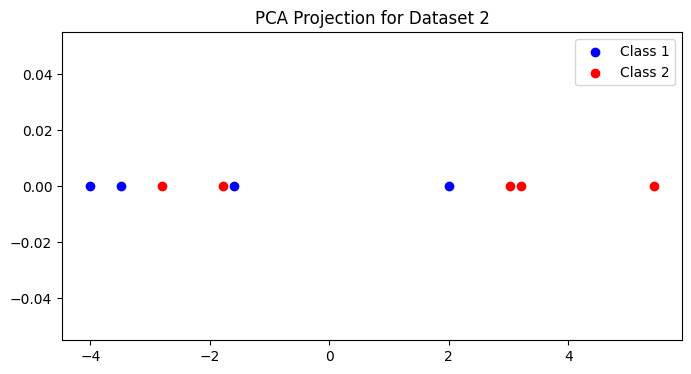

In [ ]:
# Plot PCA projection
plt.figure(figsize=(8, 4))
plt.scatter(X_pca[y == 0, 0], np.zeros(X1.shape[0]), c='b', label='Class 1')
plt.scatter(X_pca[y == 1, 0], np.zeros(X2.shape[0]), c='r', label='Class 2')
plt.legend()
plt.title('PCA Projection for Dataset 2')
plt.show()

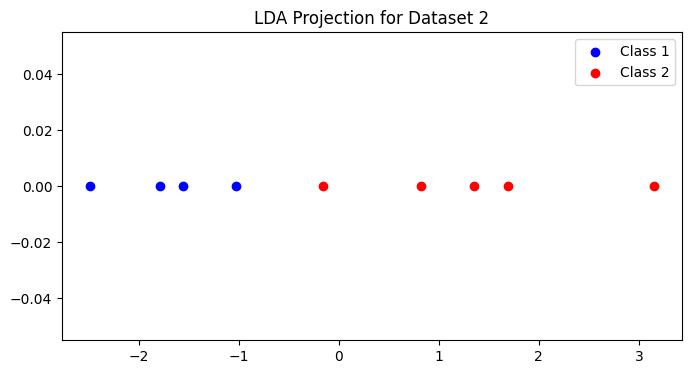

In [ ]:
# Plot LDA projection
plt.figure(figsize=(8, 4))
plt.scatter(X_lda[y == 0, 0], np.zeros(X1.shape[0]), c='b', label='Class 1')
plt.scatter(X_lda[y == 1, 0], np.zeros(X2.shape[0]), c='r', label='Class 2')
plt.legend()
plt.title('LDA Projection for Dataset 2')
plt.show()